# I535 Spring 2022 - Final Project Report
- Name - Sumitha Vellinalur Thattai
- UID - 2000722349


# Introduction:

The goal is to train a binary classification model using PySpark that will predict if a person earns more than 50,000 USD per year (target variable) based on the census information like education, employment, work class, number of working hours, etc. I will be using the publicly available census dataset from the Google Cloud Platform. This uses the United States Census Income Dataset provided by the UC Irvine Machine Learning Repository. It contains information about people from a 1994 Census database, including age, education, marital status, occupation, and from which we will predict if people earn more than $50,000 a year. I will be employing various big data concepts for making this prediction.


# Background:
This is an interesting problem since it will help us determine the income bracket of a person with very limited information about the individual. This data can be used by companies to give personalized offers. Since it is hard to predict the exact income of any individual, predicting the income bracket can help us narrow down the recommendations to a smaller subset. For example, high-income customers can be exposed to premium products. This in turn can help companies increase their customer base and also their revenue. Getting personalized recommendations is a great motivator for any individual to buy a product and will positively increase the sales of any product. Solving this problem will indirectly increase the revenue of the company.


# Methodology:
I will be using the publicly available data set on Google Cloud Platform and use BigQuery to understand how the data distribution is. Using the results from the BigQuery, I will visualize the results in Google Data Studio. 
Following is a block diagram of workflow:

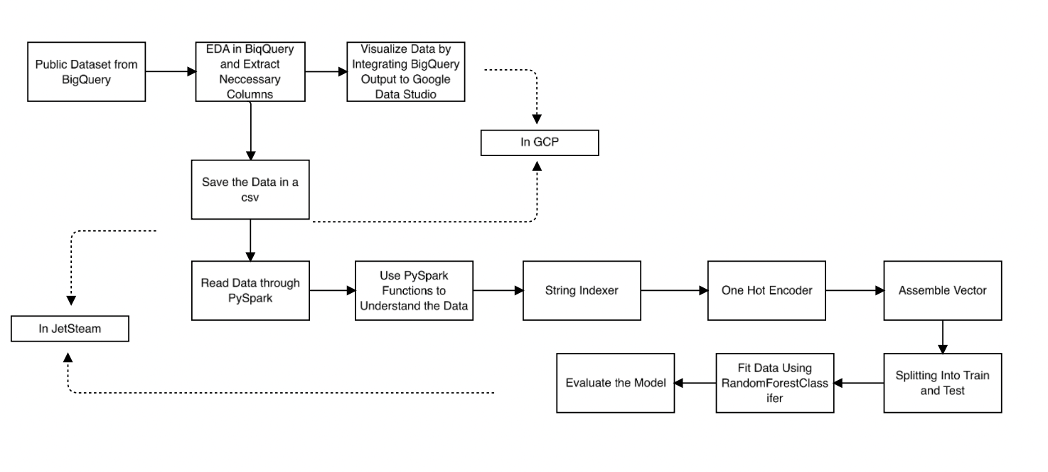

**Google Cloud Platform:**
1.	Choosing the Dataset:
    - I have used one of the publicly available dataset – Census Dataset for this project. I will be using this data to predict if the individual will earn more than $50K per year based on the information about the individual. This data has about 30k rows of data
2.	Querying and EDA:
    - Have written queries to identify patterns in the dataset
    - Visualized the data using Google Data Studio
3.	Saving the data:
    - The data after preprocessing from the BiqQuery was saved in a csv file, so we can load it in Jetstream

**JetStream:**
1.	Read the data:
    - We read the data from the csv in the format needed by PySpark
2.	Data Extraction:
    - Machine Learning algorithms in PySpark requires each sample to be in the form of a vector of continuous features. However, in our dataset, some columns are numeric and others are strings or categorical. In order to train our algorithm, we need to convert all of the string columns to numbers which will be done by the following:
        - StringIndexer
            1.	Maps the categorical values to numeric
        - OneHotEncoder
            1.	Converts numerical to vector (not needed for random forest but will be needing for logistic regression)
        - Assemble Vector
            1.	Groups all relevant columns together and creates a column with a single vector of all the features
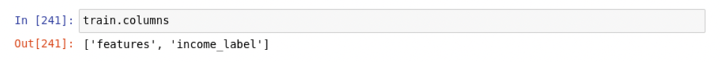

At the end of the transformation, we get only two columns – features (which includes all the input features) and income_label (which is the target variable)

3.	Training the Model:

    - We will split the data into training and test split (70:30 split). We will train the model using the training set and do the evaluation of test set.
    - In this case, I have used Random Forest to make the prediction

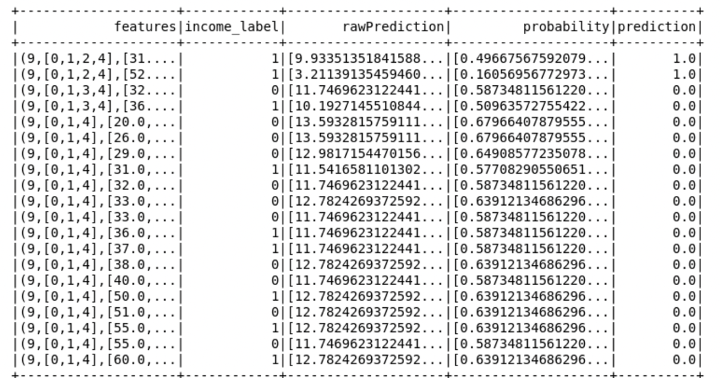

The above image shows the vectorized column (features), the target variable (income_label), and the actual prediction (prediction)

4.	Evaluating the Model:
    - We will be evaluating the model using the test data set. I have used the BinaryClassificationEvaluator function for evaluation and Roc as the evaluation metric.
    - The AUC score is 0.895
    


# Results:
I used the following queries to understand the distribution of data:
1.	Query to get the distribution of gender
- SELECT sex, count(*) as cnt FROM `bigquery-public-data.ml_datasets.census_adult_income` group by 1;
2.	Query to get the distribution of gender and race
- SELECT race, sex, count(*) as cnt FROM `bigquery-public-data.ml_datasets.census_adult_income`  group by 1, 2 order by 1; 
3.	Query to get the distribution of the target variable
- SELECT income_bracket, count(*) as cnt FROM `bigquery-public-data.ml_datasets.census_adult_income` group by 1; 
4.	Query to get the distribution of workclass and income bracket
- SELECT workclass, income_bracket, count(*) as cnt FROM `bigquery-public-data.ml_datasets.census_adult_income`  group by 1, 2 order by 1,2 desc; 
5.	Adding a new column as a target since the ML classifier requires the targte to be numeric. This will the final data
- select *, replace(replace(income_bracket,'<=50K', '0' ),'>50K','1') as income_label  from `bigquery-public-data.ml_datasets.census_adult_income` ;

Below is the screenshot of the queries that were executed in BigQuery:

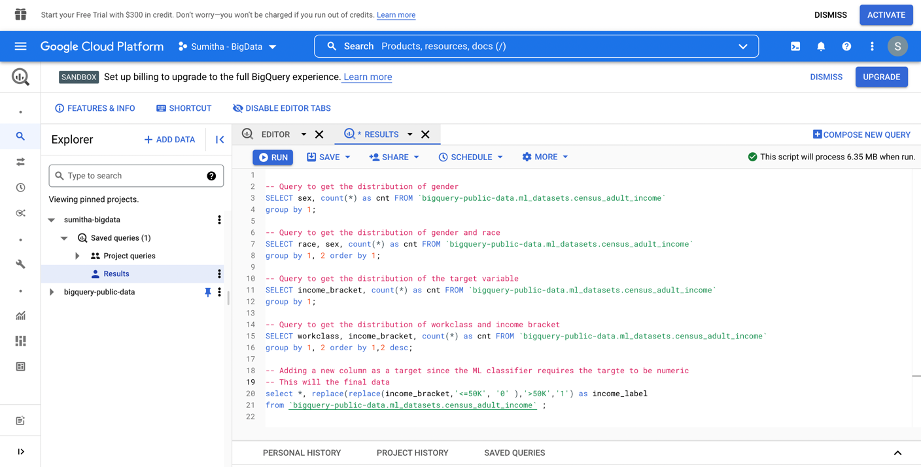

Used Google Data Studio for visualization and below are the results:
- Distribution of Gender - Two-thirds of the individuals are male
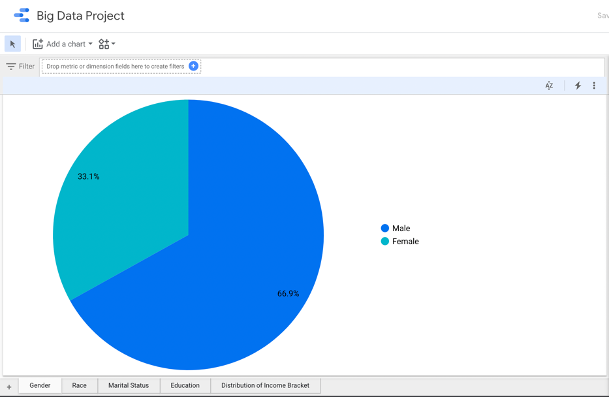

- Distribution of Race: The majority of individuals are whites and work in private companies
    
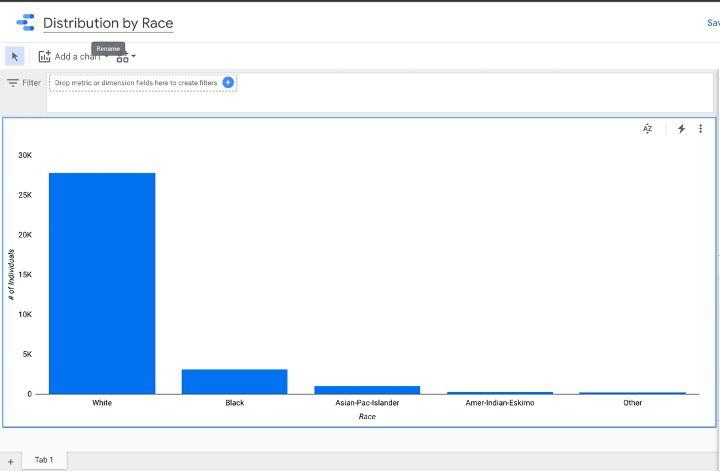

- Distribution of Work Class:
    
  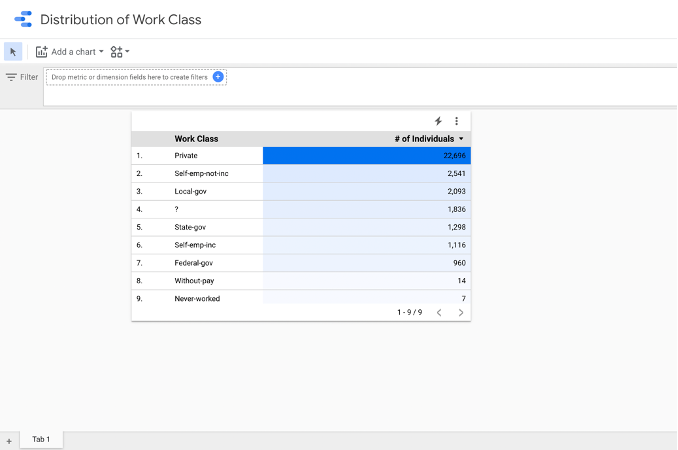  

- Distribution of Occupation:

    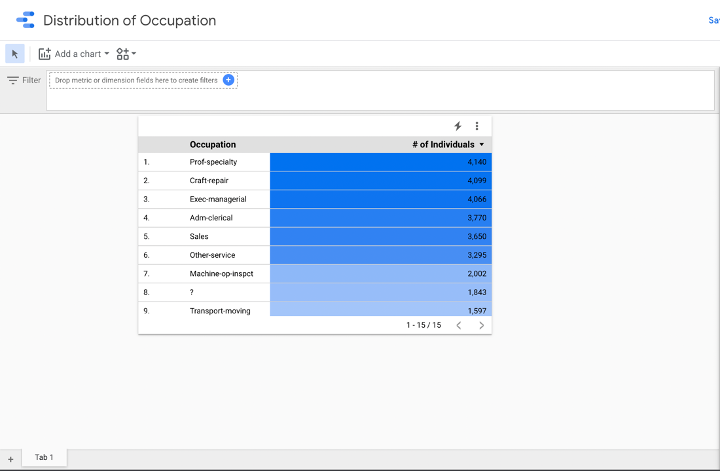

- Distribution of Target Column (income_bracket): Seeing the target variable, we see that three-fourths have income lesser than 50K in our dataset
Though there is class imbalance, 25% of data should be enough to find pattern in the classes
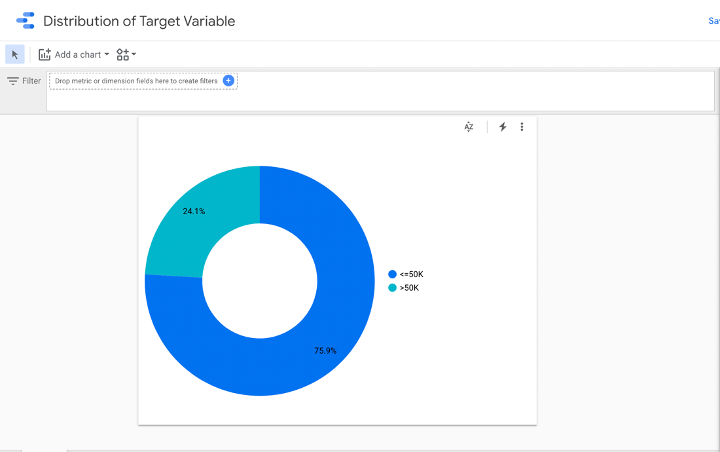

- Correlation between input and output variables: Among the numerical variables, hours per week and age are most correlated with income label
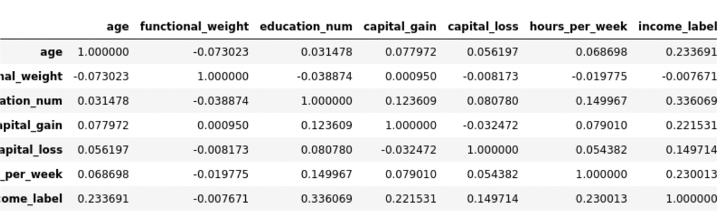

- Result of Machine Learning Model: We used the random forest classifier to predict our target variable and got an AUC score of 0.895
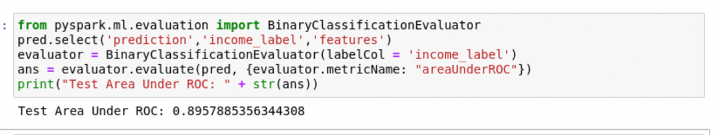

# Discussion:
1.	Pipeline:
Used lifecycle and pipeline to get this project done
USGS Model:
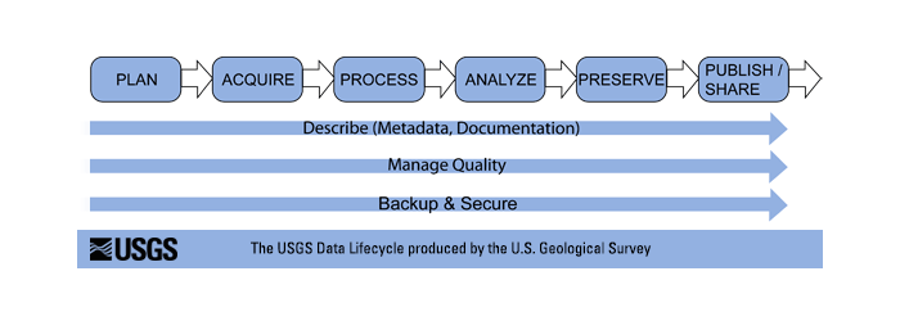

I have used the above model as a base and build the pipeline. There are a few variations in the pipeline steps. Below are the pipeline steps in detail:
- Plan:
    - Created a plan on how to get started with the project. Since I used GCP, I registered for free credits.
- Acquire:
    - Acquired data from publicly available datasets in Biqquery
- Process:
    - Initially processed the data with Bigquery I.e did some exploratory data analysis and added new column – income_label. Since the modeling requires the target variable to be numeric, we converted >=50K as 1 and <50K to be 0 and stored it in the income_label column
- Analyze:
    - I analyzed the data in PySpark. Some of the functions that are used to analyze the data are as follows:
    - PySpark SQL functions used – when, split, lit, col, row_number, create_map, map_keys, map_values, explode, 
    - PySpark ML – OneHotEncoder, StringIndexer, VectorAssembler, RandomForestClassifier, BinaryClassificationEvaluator
    
2.	Quality Improvement Solutions:
In addition to the above I adopted the following steps from DataOne Model:
- Assure – Did a data quality check by doing EDA and dropped columns to make sure the data is of good quality. 
    - Dropped rows which have nulls values
    - Dropped rows with ‘?’ in the workplace column since it does not add value to our model
    - Dropped functioal_weight column since it had about 28K unique values out of 32K rows of data indicating it might not be a significant predictor
    - Dropped columns that are not highly correlated
    - Capital_loss and capital_gain have majority of values to be zero and hence will be dropped
    - Education and education_number are the same and hence the education_number can be dropped
    - Made sure I did not bias the model. Dropped columns Sex and Race since they add bias to the model. These two columns are not related to income and should not be used for prediction

3.	Virtual machines:
Another skill that was directly used in this project is the use of Virtual Machines:
Google Cloud Platform: Used BigQuery to perform exploratory data analysis
JetStream: Used JetStream to analyze the data and build a machine learning model. I used PySpark primarily that will enable us to parallel processing.

4.	Parallel Processing:
Implemented parallel processing by means of MapReduce. For this purpose, I created a dummy key-value pair from the dataset and then used Map Reduce function that is available in Pyspark. MapReduce is used for processing large data sets in a distributed fashion and then data stored is accessed in HDFS. Map reduce maps the input to several nodes. Finally, the result was combined and reduced. Output of MapReduce:

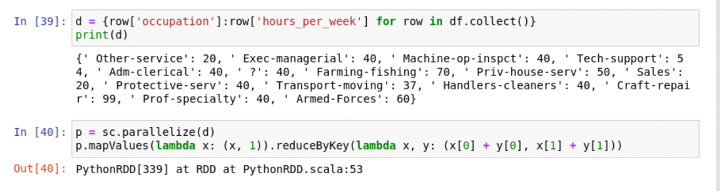

# Difficulties:
- I was finding it difficult to use the publicly available dataset from BigQuery. Solved it by following instructions in this link - https://www.optimizesmart.com/how-to-access-bigquery-public-data-sets/
- PySpark refused connections initially since there was an existing connection
- Solved by using sc = SparkContext.getOrCreate();
- Found it difficult to implement PySpark in GCP
- Jetstream in general was slow and I had to restart the kernel multiple times


# Conclusion:
The project enabled me to use a lot of big data concepts learned throughout the course. As seen from the discussion, I have used various big data techniques and concepts to analyze the income bracket dataset. The project was implemented using the virtual machine platforms GCP and Jetstream. Employed a combination of USGS and DataOne pipeline models to plan and complete the project. Querying and Exploratory data analysis were performed in GCP BigQuery and the analysis of data was done using PySpark in Jetstream. Different SQL functions were implemented using PySpark. Additionally, the model building was also done with PySpark ML library.  
In the future, I plan to implement the model using BigQuery ML. Additionally, a pipeline can be built to perform transformations (like OHE, StringIndexer), which will ensure that we will avoid data leakage.


# References:
- https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa
- https://sparkbyexamples.com/pyspark/pyspark-maptype-dict-examples/#map_keys
- https://www.analyticsvidhya.com/blog/2021/05/9-most-useful-functions-for-pyspark-dataframe/
- https://intellipaat.com/blog/tutorial/spark-tutorial/machine-learning-with-pyspark-tutorial/#:~:text=Machine%20Learning%20in%20PySpark%20is,because%20of%20the%20PySpark%20MLlib
- https://www.usgs.gov/media/images/usgs-science-data-lifecycle-model
- https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax
- https://towardsdatascience.com/beginners-guide-on-data-visualization-with-google-data-studio-3c0c26c3bff4
- https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html
- https://databricks.com/glossary/mapreduce


# Appendix

In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate();
sqlContext = SQLContext(sc)

In [2]:
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('final.csv')
df.take(5)

[Row(age=39, workclass=' Private', functional_weight=297847, education=' 9th', education_num=5, marital_status=' Married-civ-spouse', occupation=' Other-service', relationship=' Wife', race=' Black', sex=' Female', capital_gain=3411, capital_loss=0, hours_per_week=34, native_country=' United-States', income_bracket=' <=50K', income_label=0.0),
 Row(age=72, workclass=' Private', functional_weight=74141, education=' 9th', education_num=5, marital_status=' Married-civ-spouse', occupation=' Exec-managerial', relationship=' Wife', race=' Asian-Pac-Islander', sex=' Female', capital_gain=0, capital_loss=0, hours_per_week=48, native_country=' United-States', income_bracket=' >50K', income_label=1.0),
 Row(age=45, workclass=' Private', functional_weight=178215, education=' 9th', education_num=5, marital_status=' Married-civ-spouse', occupation=' Machine-op-inspct', relationship=' Wife', race=' White', sex=' Female', capital_gain=0, capital_loss=0, hours_per_week=40, native_country=' United-Stat

In [3]:
print(df.count(), len(df.columns))

30874 16


In [4]:
df.cache()
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- functional_weight: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- education_num: integer (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: integer (nullable = true)
 |-- capital_loss: integer (nullable = true)
 |-- hours_per_week: integer (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income_bracket: string (nullable = true)
 |-- income_label: double (nullable = true)



In [5]:
from pyspark.sql.functions import col,isnan,when,count
df2 = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df2.show()

+---+---------+-----------------+---------+-------------+--------------+----------+------------+----+---+------------+------------+--------------+--------------+--------------+------------+
|age|workclass|functional_weight|education|education_num|marital_status|occupation|relationship|race|sex|capital_gain|capital_loss|hours_per_week|native_country|income_bracket|income_label|
+---+---------+-----------------+---------+-------------+--------------+----------+------------+----+---+------------+------------+--------------+--------------+--------------+------------+
|  0|        0|                0|        0|            0|             0|         0|           0|   0|  0|           0|           0|             0|             0|             0|           0|
+---+---------+-----------------+---------+-------------+--------------+----------+------------+----+---+------------+------------+--------------+--------------+--------------+------------+



In [6]:
df.dropna().show(truncate=False)

+---+-------------+-----------------+---------+-------------+-------------------+------------------+------------+-------------------+-------+------------+------------+--------------+-------------------+--------------+------------+
|age|workclass    |functional_weight|education|education_num|marital_status     |occupation        |relationship|race               |sex    |capital_gain|capital_loss|hours_per_week|native_country     |income_bracket|income_label|
+---+-------------+-----------------+---------+-------------+-------------------+------------------+------------+-------------------+-------+------------+------------+--------------+-------------------+--------------+------------+
|39 | Private     |297847           | 9th     |5            | Married-civ-spouse| Other-service    | Wife       | Black             | Female|3411        |0           |34            | United-States     | <=50K        |0.0         |
|72 | Private     |74141            | 9th     |5            | Married-civ-sp

In [7]:
df_final = df.filter(df.occupation!='?')
df.show()

+---+-------------+-----------------+---------+-------------+-------------------+------------------+------------+-------------------+-------+------------+------------+--------------+-------------------+--------------+------------+
|age|    workclass|functional_weight|education|education_num|     marital_status|        occupation|relationship|               race|    sex|capital_gain|capital_loss|hours_per_week|     native_country|income_bracket|income_label|
+---+-------------+-----------------+---------+-------------+-------------------+------------------+------------+-------------------+-------+------------+------------+--------------+-------------------+--------------+------------+
| 39|      Private|           297847|      9th|            5| Married-civ-spouse|     Other-service|        Wife|              Black| Female|        3411|           0|            34|      United-States|         <=50K|         0.0|
| 72|      Private|            74141|      9th|            5| Married-civ-sp

In [8]:
print(df_final.count(), len(df_final.columns))

30874 16


In [9]:
df_final.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,30874,38.792997344043535,13.58825085149591,17,90
workclass,30874,None,None,?,Without-pay
functional_weight,30874,189377.48374036406,105533.850247998,12285,1484705
education,30874,None,None,10th,Some-college
education_num,30874,10.123631534624604,2.589199031014239,1,16
marital_status,30874,None,None,Divorced,Widowed
occupation,30874,None,None,?,Transport-moving
relationship,30874,None,None,Husband,Wife
race,30874,None,None,Amer-Indian-Eskimo,White


In [10]:
df_final.select('workclass', 'education', 'income_bracket').show(10)

+-------------+---------+--------------+
|    workclass|education|income_bracket|
+-------------+---------+--------------+
|      Private|      9th|         <=50K|
|      Private|      9th|          >50K|
|      Private|      9th|          >50K|
|      Private|      9th|         <=50K|
|      Private|      9th|         <=50K|
|      Private|      9th|         <=50K|
| Self-emp-inc|      9th|         <=50K|
|      Private|      9th|         <=50K|
|      Private|      9th|         <=50K|
|    Local-gov|      9th|          >50K|
+-------------+---------+--------------+
only showing top 10 rows



In [11]:
df_final.groupBy("occupation", "income_bracket").count().show()

+------------------+--------------+-----+
|        occupation|income_bracket|count|
+------------------+--------------+-----+
|   Priv-house-serv|         <=50K|  126|
|             Sales|         <=50K| 2492|
|   Farming-fishing|         <=50K|  838|
| Machine-op-inspct|         <=50K| 1649|
|      Adm-clerical|         <=50K| 3008|
| Machine-op-inspct|          >50K|  248|
|                 ?|          >50K|  190|
|    Prof-specialty|         <=50K| 2188|
|      Tech-support|          >50K|  277|
|   Protective-serv|          >50K|  208|
|  Transport-moving|         <=50K| 1228|
|  Transport-moving|          >50K|  316|
|   Protective-serv|         <=50K|  412|
|     Other-service|          >50K|  135|
|      Tech-support|         <=50K|  596|
|   Exec-managerial|          >50K| 1947|
|             Sales|          >50K|  974|
|      Craft-repair|         <=50K| 3002|
|   Farming-fishing|          >50K|  112|
|      Armed-Forces|         <=50K|    6|
+------------------+--------------

In [12]:
from pyspark.sql.functions import split
df1 = df_final.withColumn('Part1', split(df_final['occupation'], "-").getItem(0)).withColumn('Part2', split(df_final['occupation'], "-").getItem(1))
    
df1.select("occupation", "Part1", "Part2").show()

+------------------+--------+----------+
|        occupation|   Part1|     Part2|
+------------------+--------+----------+
|     Other-service|   Other|   service|
|   Exec-managerial|    Exec|managerial|
| Machine-op-inspct| Machine|        op|
|   Exec-managerial|    Exec|managerial|
|      Tech-support|    Tech|   support|
| Machine-op-inspct| Machine|        op|
|      Adm-clerical|     Adm|  clerical|
| Machine-op-inspct| Machine|        op|
| Machine-op-inspct| Machine|        op|
|     Other-service|   Other|   service|
|                 ?|       ?|      null|
| Machine-op-inspct| Machine|        op|
|   Farming-fishing| Farming|   fishing|
| Machine-op-inspct| Machine|        op|
| Machine-op-inspct| Machine|        op|
|   Priv-house-serv|    Priv|     house|
|     Other-service|   Other|   service|
|             Sales|   Sales|      null|
|     Other-service|   Other|   service|
|                 ?|       ?|      null|
+------------------+--------+----------+
only showing top

In [13]:
from pyspark.sql.functions import lit
df2 = df.select(col("Occupation"),col('income_bracket'),lit("role").alias("Extra_col"))
df2.show()

+------------------+--------------+---------+
|        Occupation|income_bracket|Extra_col|
+------------------+--------------+---------+
|     Other-service|         <=50K|     role|
|   Exec-managerial|          >50K|     role|
| Machine-op-inspct|          >50K|     role|
|   Exec-managerial|         <=50K|     role|
|      Tech-support|         <=50K|     role|
| Machine-op-inspct|         <=50K|     role|
|      Adm-clerical|         <=50K|     role|
| Machine-op-inspct|         <=50K|     role|
| Machine-op-inspct|         <=50K|     role|
|     Other-service|          >50K|     role|
|                 ?|         <=50K|     role|
| Machine-op-inspct|         <=50K|     role|
|   Farming-fishing|         <=50K|     role|
| Machine-op-inspct|         <=50K|     role|
| Machine-op-inspct|         <=50K|     role|
|   Priv-house-serv|         <=50K|     role|
|     Other-service|         <=50K|     role|
|             Sales|         <=50K|     role|
|     Other-service|         <=50K

In [14]:
from pyspark.sql.functions import when
df.select("occupation", when(df.hours_per_week >= "40", "High Work hours")).show()

+------------------+---------------------------------------------------------+
|        occupation|CASE WHEN (hours_per_week >= 40) THEN High Work hours END|
+------------------+---------------------------------------------------------+
|     Other-service|                                                     null|
|   Exec-managerial|                                          High Work hours|
| Machine-op-inspct|                                          High Work hours|
|   Exec-managerial|                                          High Work hours|
|      Tech-support|                                                     null|
| Machine-op-inspct|                                          High Work hours|
|      Adm-clerical|                                          High Work hours|
| Machine-op-inspct|                                          High Work hours|
| Machine-op-inspct|                                          High Work hours|
|     Other-service|                                

In [15]:
from pyspark.sql.functions import row_number,lit
from pyspark.sql.window import Window
w = Window().partitionBy('occupation').orderBy(lit('A'))
df_final = df_final.withColumn("row_num", row_number().over(w))
df_final.show()

+---+-----------------+-----------------+-------------+-------------+-------------------+----------------+------------+-------------------+-------+------------+------------+--------------+--------------+--------------+------------+-------+
|age|        workclass|functional_weight|    education|education_num|     marital_status|      occupation|relationship|               race|    sex|capital_gain|capital_loss|hours_per_week|native_country|income_bracket|income_label|row_num|
+---+-----------------+-----------------+-------------+-------------+-------------------+----------------+------------+-------------------+-------+------------+------------+--------------+--------------+--------------+------------+-------+
| 31|          Private|           399052|          9th|            5| Married-civ-spouse| Farming-fishing|        Wife|              White| Female|           0|           0|            42| United-States|         <=50K|         0.0|      1|
| 29|          Private|           100405

In [16]:
from pyspark.sql.functions import col,lit,create_map
df_map = df_final.withColumn("map",create_map(
        lit("sex"),col("sex"),
        lit("education"),col("education")
        )).drop("sex","education")
df_map.printSchema()
df_map.show(truncate=False)

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- functional_weight: integer (nullable = true)
 |-- education_num: integer (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- capital_gain: integer (nullable = true)
 |-- capital_loss: integer (nullable = true)
 |-- hours_per_week: integer (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income_bracket: string (nullable = true)
 |-- income_label: double (nullable = true)
 |-- row_num: integer (nullable = true)
 |-- map: map (nullable = false)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)

+---+-----------------+-----------------+-------------+-------------------+----------------+------------+-------------------+------------+------------+--------------+--------------+--------------+------------+-------+-----------------

In [17]:
df_map_final = df_map.select('row_num', 'map')
df_map_final.show()

+-------+--------------------+
|row_num|                 map|
+-------+--------------------+
|      1|{sex ->  Female, ...|
|      2|{sex ->  Female, ...|
|      3|{sex ->  Female, ...|
|      4|{sex ->  Female, ...|
|      5|{sex ->  Female, ...|
|      6|{sex ->  Female, ...|
|      7|{sex ->  Female, ...|
|      8|{sex ->  Female, ...|
|      9|{sex ->  Female, ...|
|     10|{sex ->  Female, ...|
|     11|{sex ->  Female, ...|
|     12|{sex ->  Female, ...|
|     13|{sex ->  Female, ...|
|     14|{sex ->  Female, ...|
|     15|{sex ->  Female, ...|
|     16|{sex ->  Male, ed...|
|     17|{sex ->  Male, ed...|
|     18|{sex ->  Male, ed...|
|     19|{sex ->  Male, ed...|
|     20|{sex ->  Male, ed...|
+-------+--------------------+
only showing top 20 rows



In [18]:
from pyspark.sql.functions import map_keys
df_map_final.select(df_map_final.row_num,map_keys(df_map_final.map)).show() 

+-------+----------------+
|row_num|   map_keys(map)|
+-------+----------------+
|      1|[sex, education]|
|      2|[sex, education]|
|      3|[sex, education]|
|      4|[sex, education]|
|      5|[sex, education]|
|      6|[sex, education]|
|      7|[sex, education]|
|      8|[sex, education]|
|      9|[sex, education]|
|     10|[sex, education]|
|     11|[sex, education]|
|     12|[sex, education]|
|     13|[sex, education]|
|     14|[sex, education]|
|     15|[sex, education]|
|     16|[sex, education]|
|     17|[sex, education]|
|     18|[sex, education]|
|     19|[sex, education]|
|     20|[sex, education]|
+-------+----------------+
only showing top 20 rows



In [19]:
from pyspark.sql.functions import map_values
df_map_final.select(df_map_final.row_num,map_values(df_map_final.map)).sample(False, 0.1, seed = 1).limit(15).show() 

+-------+-------------------+
|row_num|    map_values(map)|
+-------+-------------------+
|      4|[ Female,  5th-6th]|
|     19|      [ Male,  9th]|
|     21|      [ Male,  9th]|
|     25|      [ Male,  9th]|
|     51|     [ Male,  11th]|
|     61|     [ Male,  11th]|
|     88|  [ Male,  5th-6th]|
|    100|  [ Male,  7th-8th]|
|    101|  [ Male,  7th-8th]|
|    123|  [ Male,  7th-8th]|
|    138|  [ Male,  7th-8th]|
|    146|  [ Male,  HS-grad]|
|    147|  [ Male,  HS-grad]|
|    157|  [ Male,  HS-grad]|
|    162|  [ Male,  HS-grad]|
+-------+-------------------+



In [20]:
from pyspark.sql.functions import explode
keysDF = df_map_final.select(explode(map_keys(df_map_final.map))).distinct()
keysList = keysDF.rdd.map(lambda x:x[0]).collect()
print(keysList)

['education', 'sex']


In [21]:
df_pandas = df_final.toPandas()

In [22]:
import pandas as pd
df_pandas.corr()

,age,functional_weight,education_num,capital_gain,capital_loss,hours_per_week,income_label,row_num
age,1.000000,-0.073023,0.031478,0.077972,0.056197,0.068698,0.233691,-0.094001
functional_weight,-0.073023,1.000000,-0.038874,0.000950,-0.008173,-0.019775,-0.007671,0.008778
education_num,0.031478,-0.038874,1.000000,0.123609,0.080780,0.149967,0.336069,0.248796
capital_gain,0.077972,0.000950,0.123609,1.000000,-0.032472,0.079010,0.221531,-0.000298
capital_loss,0.056197,-0.008173,0.080780,-0.032472,1.000000,0.054382,0.149714,-0.012763
hours_per_week,0.068698,-0.019775,0.149967,0.079010,0.054382,1.000000,0.230013,0.011836
income_label,0.233691,-0.007671,0.336069,0.221531,0.149714,0.230013,1.000000,-0.149614
row_num,-0.094001,0.008778,0.248796,-0.000298,-0.012763,0.011836,-0.149614,1.000000


In [37]:
df_pandas.info()V

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30874 entries, 0 to 30873
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                30874 non-null  int32  
 1   workclass          30874 non-null  object 
 2   functional_weight  30874 non-null  int32  
 3   education          30874 non-null  object 
 4   education_num      30874 non-null  int32  
 5   marital_status     30874 non-null  object 
 6   occupation         30874 non-null  object 
 7   relationship       30874 non-null  object 
 8   race               30874 non-null  object 
 9   sex                30874 non-null  object 
 10  capital_gain       30874 non-null  int32  
 11  capital_loss       30874 non-null  int32  
 12  hours_per_week     30874 non-null  int32  
 13  native_country     30874 non-null  object 
 14  income_bracket     30874 non-null  object 
 15  income_label       30874 non-null  float64
 16  row_num            308

In [39]:
d = {row['occupation']:row['hours_per_week'] for row in df.collect()}
print(d)

{' Other-service': 20, ' Exec-managerial': 40, ' Machine-op-inspct': 40, ' Tech-support': 54, ' Adm-clerical': 40, ' ?': 40, ' Farming-fishing': 70, ' Priv-house-serv': 50, ' Sales': 20, ' Protective-serv': 40, ' Transport-moving': 37, ' Handlers-cleaners': 40, ' Craft-repair': 99, ' Prof-specialty': 40, ' Armed-Forces': 60}


In [40]:
p = sc.parallelize(d)
p.mapValues(lambda x: (x, 1)).reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

PythonRDD[339] at RDD at PythonRDD.scala:53

In [41]:
d

{' Other-service': 20,
 ' Exec-managerial': 40,
 ' Machine-op-inspct': 40,
 ' Tech-support': 54,
 ' Adm-clerical': 40,
 ' ?': 40,
 ' Farming-fishing': 70,
 ' Priv-house-serv': 50,
 ' Sales': 20,
 ' Protective-serv': 40,
 ' Transport-moving': 37,
 ' Handlers-cleaners': 40,
 ' Craft-repair': 99,
 ' Prof-specialty': 40,
 ' Armed-Forces': 60}

In [23]:
cols = ['age',
 'workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_label']

In [24]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
categoricalColumns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex']


for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    #encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    df_final = stringIndexer.fit(df_final).transform(df_final)
   # df_final = encoder.fit(df_final).transform(df_final)


    


In [25]:
df_final.columns

['age',
 'workclass',
 'functional_weight',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_bracket',
 'income_label',
 'row_num',
 'workclassIndex',
 'educationIndex',
 'marital_statusIndex',
 'occupationIndex',
 'relationshipIndex',
 'raceIndex',
 'sexIndex']

In [26]:
df_final = df_final.drop('workclass','row_num', 'education', 'marital_status', 'occupation','income_bracket', 'relationship','native_country', 'race', 'sex', 'native_country')

In [27]:
df_final = df_final.withColumn('income_label', df_final['income_label'].cast('Integer'))

In [28]:
assembler = VectorAssembler(inputCols = ['age',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclassIndex',
 'educationIndex',
 'marital_statusIndex',
 'occupationIndex'],
                           outputCol = 'features')

In [29]:
output = assembler.transform(df_final)

In [30]:
df_final_new = output.select('features','income_label')
train, test = df_final_new.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 21637
Test Dataset Count: 9237


In [31]:
train.columns

['features', 'income_label']

In [32]:
from pyspark.ml.classification import RandomForestClassifier
rc = RandomForestClassifier(featuresCol='features', labelCol='income_label')
rcModel = rc.fit(train)

In [33]:
pred = rcModel.transform(test)

In [34]:
pred.show()

+--------------------+------------+--------------------+--------------------+----------+
|            features|income_label|       rawPrediction|         probability|prediction|
+--------------------+------------+--------------------+--------------------+----------+
|(9,[0,1,2,4],[31....|           1|[9.93351351841588...|[0.49667567592079...|       1.0|
|(9,[0,1,2,4],[52....|           1|[3.21139135459460...|[0.16056956772973...|       1.0|
|(9,[0,1,3,4],[32....|           0|[11.7469623122441...|[0.58734811561220...|       0.0|
|(9,[0,1,3,4],[36....|           1|[10.1927145510844...|[0.50963572755422...|       0.0|
|(9,[0,1,4],[20.0,...|           0|[13.5932815759111...|[0.67966407879555...|       0.0|
|(9,[0,1,4],[26.0,...|           0|[13.5932815759111...|[0.67966407879555...|       0.0|
|(9,[0,1,4],[29.0,...|           0|[12.9817154470156...|[0.64908577235078...|       0.0|
|(9,[0,1,4],[31.0,...|           1|[11.5416581101302...|[0.57708290550651...|       0.0|
|(9,[0,1,4],[32.0,...

In [35]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
pred.select('prediction','income_label','features')
evaluator = BinaryClassificationEvaluator(labelCol = 'income_label')
ans = evaluator.evaluate(pred, {evaluator.metricName: "areaUnderROC"})
print("Test Area Under ROC: " + str(ans))

Test Area Under ROC: 0.8957885356344308
